In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
# mouse_metadata = pd.read_csv(mouse_drug_data_to_load)
# trial_results = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
# study_data_complete = pd.merge(trial_results, mouse_metadata, how="left", on="Mouse ID")


# Display the data table for preview
# study_data_complete.head()


In [3]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_metadata = pd.read_csv(mouse_drug_data_to_load)
trial_results = pd.read_csv(clinical_trial_data_to_load)

mouse_metadata.head()
trial_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
study_data_complete = pd.merge(trial_results, mouse_metadata, how="left", on="Mouse ID")

In [5]:
# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor = study_data_complete.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"]
mean_tumor = tumor.mean()
mean_tumor

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
                          ...    
Zoniferol  25           55.432935
           30           57.713531
           35           60.089372
           40           62.916692
           45           65.960888
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [39]:
# Convert to DataFrame
mean_tumor_df = pd.DataFrame(mean_tumor).reset_index()

In [40]:
# Preview DataFrame
mean_tumor_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [32]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor = study_data_complete.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"]
tumor.sem()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.448593
           10           0.702684
           15           0.838617
           20           0.909731
                          ...   
Zoniferol  25           0.602513
           30           0.800043
           35           0.881426
           40           0.998515
           45           1.003576
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [33]:
# Convert to DataFrame
tumor_vol_sem_df = pd.DataFrame(tumor.sem()).reset_index()
tumor_vol_sem_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [44]:
mean_tumor_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [51]:
mean_tumor_df["Drug"].unique()

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

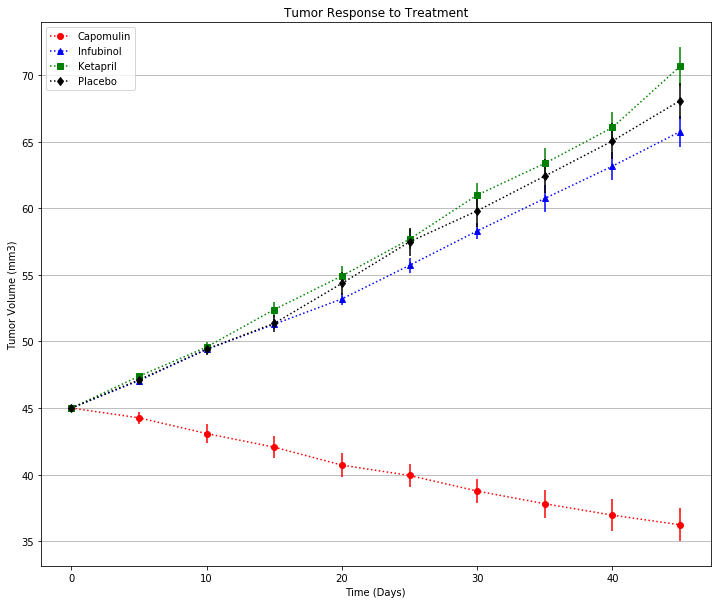

In [75]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(figsize=(12,10))


ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response to Treatment")

ax.plot(mean_tumor["Capomulin"], color="red", marker="o", linestyle="dotted", label="Capomulin")
ax.plot(mean_tumor["Infubinol"], color="blue", marker="^", linestyle="dotted", label="Infubinol")
ax.plot(mean_tumor["Ketapril"], color="green", marker="s", linestyle="dotted", label="Ketapril")
ax.plot(mean_tumor["Placebo"], color="black", marker="d", linestyle="dotted", label="Placebo")

x_axis = np.arange(0, 50, 5)

ax.errorbar(x_axis, mean_tumor["Capomulin"], tumor.sem()["Capomulin"], color="red", linestyle="")
ax.errorbar(x_axis, mean_tumor["Infubinol"], tumor.sem()["Infubinol"], color="blue", linestyle="")
ax.errorbar(x_axis, mean_tumor["Ketapril"], tumor.sem()["Ketapril"], color="green", linestyle="")
ax.errorbar(x_axis, mean_tumor["Placebo"], tumor.sem()["Placebo"], color="black", linestyle="")

ax.yaxis.grid()

ax.legend()
# Save the Figure



In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [1]:
study_data_complete.head()

NameError: name 'study_data_complete' is not defined

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)